

Tài: %2 == 1

Phú : %2 == 0



In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt 

Checkered Board

In [4]:
def create_checkerBoard_numpy(n, sz):
    """
    Hàm: tạo bàn cờ bằng NumPy
    Input: 
        n - số ô vuông trong 1 hàng.
        sz - kích thước mỗi ô vuông.
    Output: 
        Ảnh checkerboard.
    """
    board_size = n * sz
    board = np.ones((board_size, board_size), dtype=np.uint8) * 255
    
    for i in range(n):
        for j in range(n):
            if (i + j) % 2 == 0:
                board[i*sz:(i+1)*sz, j*sz:(j+1)*sz] = 0

    return board

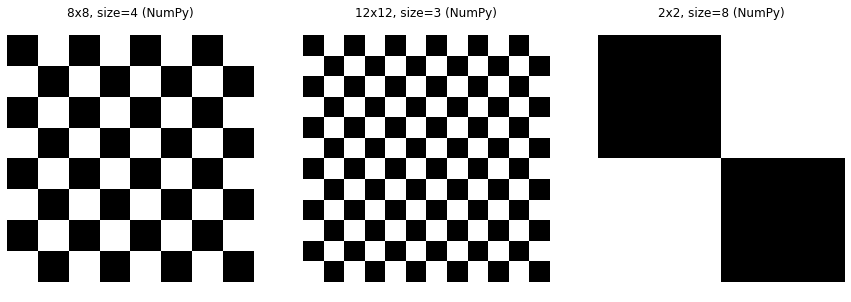

In [5]:
# Tạo các ảnh bàn cờ với các kích thước khác nhau
board1 = create_checkerBoard_numpy(8, 4)
board2 = create_checkerBoard_numpy(12, 3)
board3 = create_checkerBoard_numpy(2, 8)

# Hiển thị ảnh bàn cờ bằng Matplotlib với kích thước gốc
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(board1, cmap='gray', interpolation='nearest')
plt.title('8x8, size=4 (NumPy)')
plt.axis('equal')  
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(board2, cmap='gray', interpolation='nearest')
plt.title('12x12, size=3 (NumPy)')
plt.axis('equal')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(board3, cmap='gray', interpolation='nearest')
plt.title('2x2, size=8 (NumPy)')
plt.axis('equal')
plt.axis('off')

plt.show()

In [6]:
def create_checkerBoard_opencv(n, sz):
    """
    Hàm: tạo bàn cờ bằng OpenCV
    Input: 
        n - số ô vuông trong 1 hàng.
        sz - kích thước mỗi ô vuông.
    Output: 
        Ảnh checkerboard.
    """
    board_size = n * sz
    board = np.zeros((board_size, board_size), dtype=np.uint8)
    
    for i in range(0, board_size, sz*2):
        for j in range(0, board_size, sz*2):
            cv2.rectangle(board, (j, i), (j+sz-1, i+sz-1), (255,), thickness=-1)
            cv2.rectangle(board, (j+sz, i+sz), (j+2*sz-1, i+2*sz-1), (255,), thickness=-1)
    
    return board

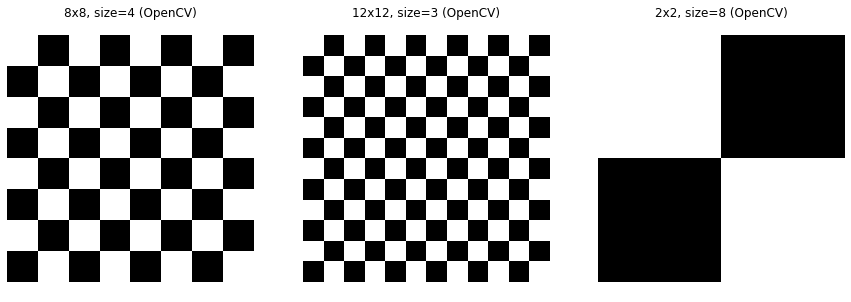

In [7]:
# Tạo các ảnh bàn cờ với các kích thước khác nhau
board1 = create_checkerBoard_opencv(8, 4)
board2 = create_checkerBoard_opencv(12, 3)
board3 = create_checkerBoard_opencv(2, 8)

# Hiển thị ảnh bàn cờ bằng Matplotlib với kích thước gốc
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(board1, cmap='gray', interpolation='nearest')
plt.title('8x8, size=4 (OpenCV)')
plt.axis('equal')  
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(board2, cmap='gray', interpolation='nearest')
plt.title('12x12, size=3 (OpenCV)')
plt.axis('equal')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(board3, cmap='gray', interpolation='nearest')
plt.title('2x2, size=8 (OpenCV)')
plt.axis('equal')
plt.axis('off')

plt.show()

Color Correction

In [8]:
# Chuyển từ ảnh màu sang ảnh xám
'''
task1: build hàm chuyển từ ảnh màu sang xám:
  input: ảnh màu, option(1, 2, 3)
    1: trung bình
    2: công thức
    3: dùng công thức open cv
  output: ảnh xám
'''

'''
task2:  Đổi trắng thành đen và ngược lại từ ảnh xám trên
255-gray_img
'''


'\ntask2:  Đổi trắng thành đen và ngược lại từ ảnh xám trên\n255-gray_img\n'

Rotate image

### Ma Trận Xoay

Xoay ảnh là một dạng của phép biến đổi hình học. Ma trận xoay có dạng như sau:

$$
\begin{bmatrix}
\cos\theta & -\sin\theta \\
\sin\theta & \cos\theta \\
\end{bmatrix}
$$

Trong đó:
- $\theta$ là góc xoay theo chiều ngược kim đồng hồ.

### Nhân Ma Trận Affine

Ma trận affine là ma trận dùng để thực hiện các phép biến đổi như dịch chuyển, quay, co giãn và cắt xén trên ảnh. Khi áp dụng các phép biến đổi này, chúng ta sử dụng ma trận affine để tính toán vị trí mới của các điểm trong ảnh.

Để áp dụng ma trận affine cho một điểm (x, y), ta sử dụng phép nhân ma trận như sau:

$$
\begin{bmatrix}
x' \\
y' \\
1
\end{bmatrix}
=
\begin{bmatrix}
\cos\theta & -\sin\theta & tx \\
\sin\theta & \cos\theta & ty \\
0 & 0 & 1
\end{bmatrix}
\cdot
\begin{bmatrix}
x \\
y \\
1
\end{bmatrix}
$$

**Trong đó:**
- \(x'\) và \(y'\) là tọa độ mới của điểm sau khi áp dụng phép biến đổi.
- $ t_x $ và $ t_y $ là các giá trị dịch chuyển để đảm bảo hình ảnh được đặt đúng vị trí sau khi xoay.

In [9]:
def rotate_image_no_crop_numpy(image, angle):
    """
    Xoay ảnh mà không bị cắt góc bằng NumPy thuần.
    Input:
        - image: Ảnh đầu vào (numpy array)
        - angle: Góc xoay (theo độ, ngược chiều kim đồng hồ)
    Output:
        - Ảnh đã được xoay
    """
    
    (h, w) = image.shape[:2]
    center = (w / 2, h / 2)

    # Chuyển góc từ độ sang radian
    radians = np.deg2rad(angle)
    cos_theta = np.cos(radians)
    sin_theta = np.sin(radians)

    # Tính toán kích thước mới của ảnh
    new_w = int(h * np.abs(sin_theta) + w * np.abs(cos_theta))
    new_h = int(h * np.abs(cos_theta) + w * np.abs(sin_theta))

    # Ma trận xoay
    rotation_matrix = np.array([
        [cos_theta, -sin_theta],
        [sin_theta,  cos_theta]
    ])

    # Ma trận dịch chuyển để căn chỉnh trung tâm ảnh mới
    translation_matrix = np.array([
        [1, 0, (new_w / 2) - center[0]],
        [0, 1, (new_h / 2) - center[1]],
        [0, 0, 1]
    ])

    # Tạo ma trận affine tổng hợp
    full_transform = np.dot(translation_matrix, np.vstack([
        np.hstack([rotation_matrix, [[0], [0]]]),
        [0, 0, 1]
    ]))

    # Tạo ảnh mới
    transformed_image = np.zeros((new_h, new_w, 3), dtype=image.dtype)

    # Áp dụng phép biến đổi affine để sao chép giá trị pixel từ ảnh gốc
    for y in range(new_h):
        for x in range(new_w):
            # Tính toán tọa độ gốc trong ảnh gốc
            src_x, src_y = np.dot(full_transform[:2, :2], np.array([x - new_w / 2, y - new_h / 2])) + np.array([center[0], center[1]])
            src_x, src_y = int(np.round(src_x)), int(np.round(src_y))
            if 0 <= src_x < w and 0 <= src_y < h:
                transformed_image[y, x] = image[src_y, src_x]

    return transformed_image

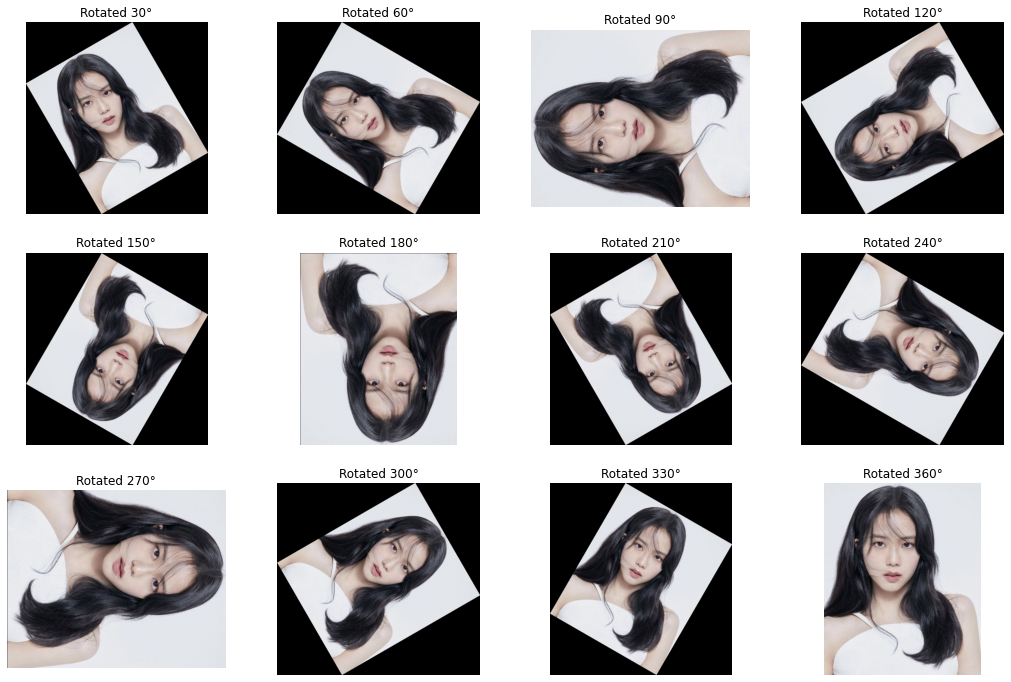

In [10]:
# Đọc ảnh đầu vào
image = cv2.imread('jisoo.jpg', cv2.IMREAD_COLOR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Tạo lưới subplot 3x4
plt.figure(figsize=(18, 12))

# Sử dụng vòng lặp để xoay ảnh theo các góc từ 30 độ đến 360 độ với bước nhảy 30 độ
for i, angle in enumerate(range(30, 361, 30), start=1):
    rotated_image = rotate_image_no_crop_numpy(image, angle)
    plt.subplot(3, 4, i)
    plt.imshow(rotated_image)
    plt.title(f'Rotated {angle}°')
    plt.axis('off')

plt.show()

In [11]:
def rotate_image_no_crop_opencv(image, angle):
    (h, w) = image.shape[:2]
    center = (w / 2, h / 2)

    # Tạo ma trận xoay
    rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1.0)

    # Tính toán kích thước mới của ảnh sau khi xoay để không bị cắt góc
    radians = np.deg2rad(angle)
    cos = np.abs(np.cos(radians))
    sin = np.abs(np.sin(radians))

    new_w = int((h * sin) + (w * cos))
    new_h = int((h * cos) + (w * sin))

    # Điều chỉnh ma trận xoay để đặt ảnh ở trung tâm khung hình mới
    rotation_matrix[0, 2] += (new_w / 2) - center[0]
    rotation_matrix[1, 2] += (new_h / 2) - center[1]

    # Thực hiện phép biến đổi affine (xoay ảnh)
    rotated_image = cv2.warpAffine(image, rotation_matrix, (new_w, new_h))

    return rotated_image


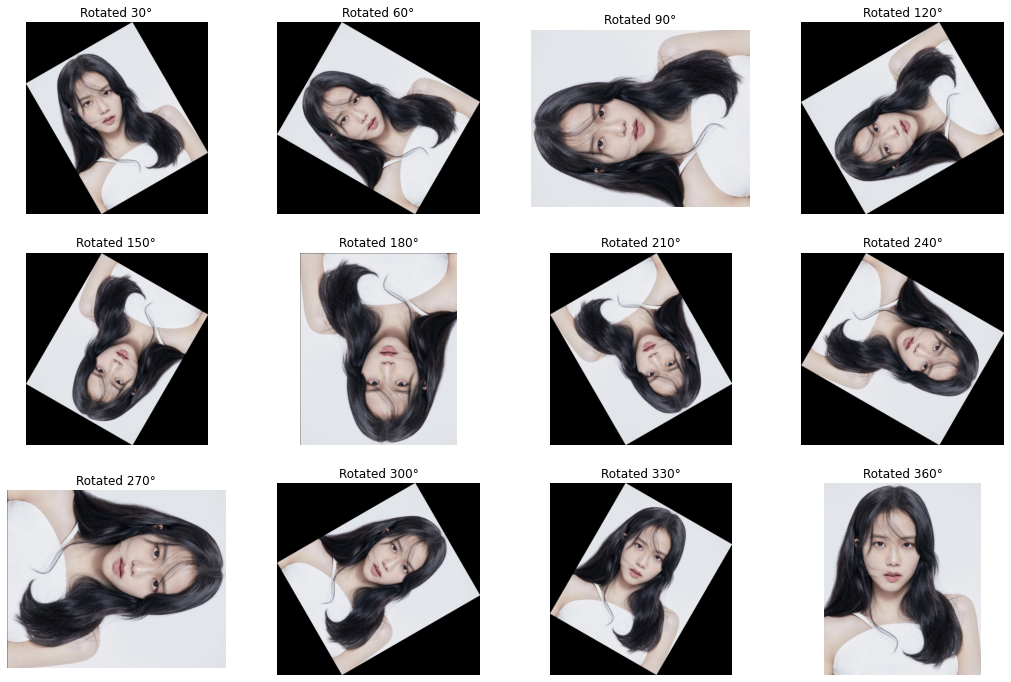

In [12]:
# Đọc ảnh đầu vào
image = cv2.imread('jisoo.jpg', cv2.IMREAD_COLOR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Tạo lưới subplot 3x4
plt.figure(figsize=(18, 12))

# Sử dụng vòng lặp để xoay ảnh theo các góc từ 30 độ đến 360 độ với bước nhảy 30 độ
for i, angle in enumerate(range(30, 361, 30), start=1):
    rotated_image = rotate_image_no_crop_opencv(image, angle)
    plt.subplot(3, 4, i)
    plt.imshow(rotated_image)
    plt.title(f'Rotated {angle}°')
    plt.axis('off')

plt.show()

In [13]:
def flip_image_numpy(image, flip_code):
    """
    Lật ảnh theo chiều ngang hoặc dọc bằng NumPy.
    Input: 
        - image: ảnh đầu vào (NumPy array)
        - flip_code: mã lật (0 = lật dọc, 1 = lật ngang)
    Output: 
        - Ảnh đã được lật
    """
    
    if flip_code == 0:
        flipped_image = image[::-1, :, :]  # Lật ảnh theo chiều dọc (trên <-> dưới)
    elif flip_code == 1:
        flipped_image = image[:, ::-1, :]  # Lật ảnh theo chiều ngang (trái <-> phải)
    else:
        raise ValueError("flip_code must be 0 (vertical) or 1 (horizontal)")
    
    return flipped_image

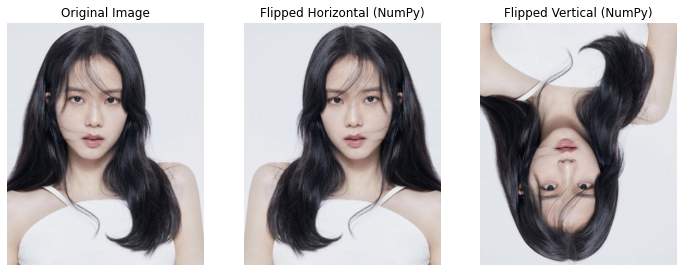

In [14]:
image = cv2.imread('jisoo.jpg', cv2.IMREAD_COLOR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Lật ảnh bằng NumPy
flipped_image_horizontal = flip_image_numpy(image, 1)  # Lật ngang
flipped_image_vertical = flip_image_numpy(image, 0)    # Lật dọc

# Hiển thị ảnh gốc và ảnh đã lật
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(flipped_image_horizontal)
plt.title('Flipped Horizontal (NumPy)')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(flipped_image_vertical)
plt.title('Flipped Vertical (NumPy)')
plt.axis('off')

plt.show()

Color separation

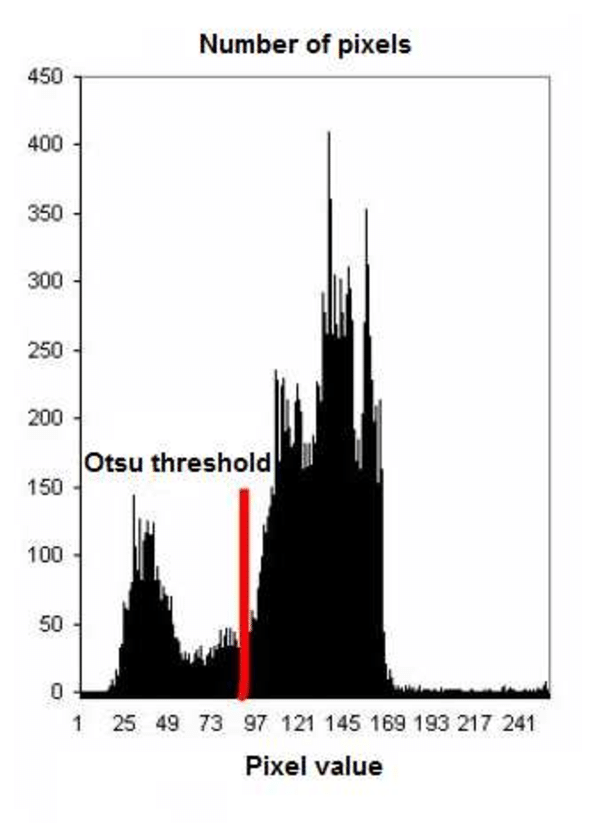

In [15]:
#Tách 1 đối tượng ra khỏi ảnh đen trắng
'''
input: ảnh xám
những  điểm ảnh lớn hơn thresh hold giữ lại
ngược lại gán thành màu đen


hàm tách nền:
        for  i
          for j
                img[i][j] < hold img[i][j] = 0
                else img [i][j] không thay doi

Xác định ngưỡng: Bằng thống kê thực nghiệm
histogram
chọn ra 3 ngưỡng bất kỳ vẽ ảnh, chọn ra ngưỡng ok nhất


output:
'''

'\ninput: ảnh xám\nnhững  điểm ảnh lớn hơn thresh hold giữ lại\nngược lại gán thành màu đen\n\n\nhàm tách nền:\n        for  i\n          for j\n                img[i][j] < hold img[i][j] = 0\n                else img [i][j] không thay doi\n\nXác định ngưỡng: Bằng thống kê thực nghiệm\nhistogram\nchọn ra 3 ngưỡng bất kỳ vẽ ảnh, chọn ra ngưỡng ok nhất\n\n\noutput:\n'

Corner line


In [16]:
# #Tạo đường line góc trái trên
# '''
# input: ảnh
# option : Kích thước đường line, góc
# output: có đường line góc nào đó

# 1aq
# '''

In [28]:
def shift_image(image, shift_x, shift_y):
    """
    Dịch ảnh lên `shift_x` hàng và qua trái `shift_y` cột bằng OpenCV.
    """
    (h, w) = image.shape[:2]

    # Tạo ma trận dịch chuyển
    translation_matrix = np.float32([
        [1, 0, shift_y],
        [0, 1, shift_x]
    ])

    # Áp dụng ma trận dịch chuyển cho ảnh
    shifted_image = cv2.warpAffine(image, translation_matrix, (w, h))

    return shifted_image


In [29]:
def rotate_image_no_crop_numpy(image, angle):
    """
    Xoay ảnh mà không thay đổi kích thước bằng NumPy
    Input:
        - image: Ảnh đầu vào (numpy array)
        - angle: Góc xoay (theo độ, ngược chiều kim đồng hồ)
    Output:
        - Ảnh đã được xoay mà không thay đổi kích thước
    """
    
    (h, w) = image.shape[:2]
    center = (w / 2, h / 2)

    # Chuyển góc từ độ sang radian
    radians = np.deg2rad(angle)
    cos_theta = np.cos(radians)
    sin_theta = np.sin(radians)

    # Ma trận xoay
    rotation_matrix = np.array([
        [cos_theta, -sin_theta],
        [sin_theta,  cos_theta]
    ])

    # Tạo ảnh mới có cùng kích thước với ảnh gốc
    rotated_image = np.zeros_like(image)

    # Áp dụng phép biến đổi affine để sao chép giá trị pixel từ ảnh gốc
    for y in range(h):
        for x in range(w):
            # Tính toán tọa độ trong ảnh gốc
            new_coords = np.dot(rotation_matrix, np.array([x - center[0], y - center[1]])) + np.array([center[0], center[1]])
            src_x, src_y = int(np.round(new_coords[0])), int(np.round(new_coords[1]))
            if 0 <= src_x < w and 0 <= src_y < h:
                rotated_image[y, x] = image[src_y, src_x]

    return rotated_image

In [36]:
def create_rotated_line(image, line_thickness, angle, shift_percentage=33):
    """
    Tạo đường line qua trung tâm, xoay theo góc và dịch lên góc trái trên.
    Input: 
        - image: ảnh đầu vào (NumPy array)
        - line_thickness: độ dày của đường line
        - angle: góc quay (theo độ)
        - shift_percentage: % khoảng cách từ biên tới tâm ảnh để dịch chuyển
    Output: 
        - Ảnh đã được tạo đường line
    """
    
    # Vẽ đường line ngang qua trung tâm
    line_image = np.ones_like(image) * 0 
    (h, w) = image.shape[:2]    
    line_image[h // 2-line_thickness//2:h // 2+line_thickness//2, 0:w] = 255
    
    # Quay đường line theo góc chỉ định
    rotated_line = rotate_image_no_crop_numpy(line_image, angle)
    
    # Dịch đường line lên góc trái trên
    shift_x = int(-shift_percentage * rotated_line.shape[0] / 100)
    shift_y = int(-shift_percentage * rotated_line.shape[1] / 100)
    shifted_line = 255 - shift_image(rotated_line, shift_x, shift_y)
    
    # Vẽ đường line lên ảnh gốc
    result_image = np.minimum(image, shifted_line)
    
    return result_image

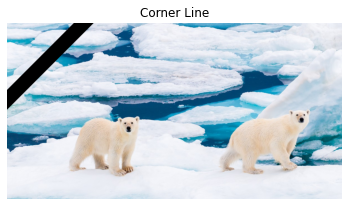

In [42]:
image = cv2.imread('Corner Line.jpg', cv2.IMREAD_COLOR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Tạo đường line có độ dày 10 và xoay 45 độ
line_image = create_rotated_line(image, line_thickness=50, angle=45, shift_percentage=35)

# Hiển thị ảnh kết quả
plt.imshow(line_image, cmap='gray')
plt.title('Corner Line')
plt.axis('off')
plt.show()

Gradient


In [43]:
#Tạo ảnh gradient từ trắng về đen
'''

Xác định kích thước mỗi chiều
Xác định mức xám mỗi chiều

Giảm dần theo cột,
giảm dần theo hàng

thêm ảnh gradinet rgb

output: ảnh gradient
'''

'\n\nXác định kích thước mỗi chiều\nXác định mức xám mỗi chiều\n\nGiảm dần theo cột,\ngiảm dần theo hàng\n\nthêm ảnh gradinet rgb\n\noutput: ảnh gradient\n'

Letter B

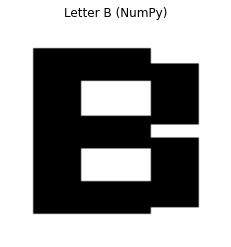

In [44]:
def create_letter_E_numpy(size, thickness):
    """
    Tạo chữ cái 'B' bằng cách vẽ chữ cái 'E' trước và nối thêm các hình chữ nhật.
    Input:
        - thickness: Độ dày của các nét chữ.
        - rect_size: Kích thước của các hình chữ nhật nối thêm.
    Output:
        - Ảnh chứa chữ cái 'B'.
    """
    
    margin = size//8
    image = np.ones((size, size), dtype=np.uint8) * 255 

    # Vẽ chữ E
    image[margin:size-margin, margin:margin+int(1.5*thickness)] = 0                                            # Dòng thẳng bên trái
    image[margin:margin+thickness, margin:size-margin-int(1.5*thickness)] = 0                                  # Dòng ngang trên cùng
    image[size//2-thickness//2:size//2+thickness-thickness//2, margin:size-margin-int(1.5*thickness)] = 0      # Dòng ngang giữa
    image[size-margin-thickness:size-margin, margin:size-margin-int(1.5*thickness)] = 0                        # Dòng ngang dưới cùng

    # Vẽ thêm các hình chữ nhật nối chữ E thành chữ B 
    image[margin+thickness//2:size//2-thickness//4, size-margin-int(1.5*thickness):size-margin] = 0            # Dòng thẳng giữa phải
    image[size//2+thickness//4:size-margin-thickness//4, size-margin-int(1.5*thickness):size-margin] = 0       # Dòng thẳng dưới phải

    return image

# Tạo chữ B và hiển thị
letter_B_numpy = create_letter_E_numpy(size=100, thickness=15)

plt.imshow(letter_B_numpy, cmap='gray')
plt.title('Letter B (NumPy)')
plt.axis('off')
plt.show()

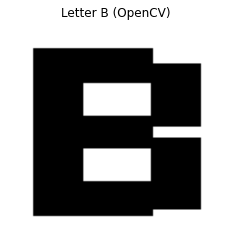

In [45]:
def create_letter_B_opencv(size, thickness):
    """
    Tạo chữ cái 'B' bằng cách vẽ chữ cái 'E' trước và nối thêm các hình chữ nhật.
    Input:
        - size: Kích thước ảnh.
        - thickness: Độ dày của các nét chữ.
    Output:
        - Ảnh chứa chữ cái 'B'.
    """
    margin = size // 8
    image = np.ones((size, size), dtype=np.uint8) * 255

    # Vẽ chữ E bằng OpenCV
    cv2.rectangle(image, (margin, margin), (margin + int(1.5 * thickness), size - margin), 0, -1)  # Dòng thẳng bên trái
    cv2.rectangle(image, (margin, margin), (size - margin - int(1.5 * thickness), margin + thickness), 0, -1)  # Dòng ngang trên cùng
    cv2.rectangle(image, (margin, size // 2 - thickness // 2), (size - margin - int(1.5 * thickness), size // 2 + thickness // 2), 0, -1)  # Dòng ngang giữa
    cv2.rectangle(image, (margin, size - margin - thickness), (size - margin - int(1.5 * thickness), size - margin), 0, -1)  # Dòng ngang dưới cùng

    # Vẽ thêm các hình chữ nhật nối chữ E thành chữ B 
    cv2.rectangle(image, (size - margin - int(1.5 * thickness), margin + thickness // 2), (size - margin, size // 2 - thickness // 4), 0, -1)  # Dòng thẳng giữa phải
    cv2.rectangle(image, (size - margin - int(1.5 * thickness), size // 2 + thickness // 4), (size - margin, size - margin - thickness // 4), 0, -1)  # Dòng thẳng dưới phải

    return image

# Tạo chữ B và hiển thị
letter_B_opencv = create_letter_B_opencv(size=100, thickness=15)

plt.imshow(letter_B_opencv, cmap='gray')
plt.title('Letter B (OpenCV)')
plt.axis('off')
plt.show()

Find Secrect by substract

In [52]:

'''
Xài open cv gen ra 2 hinh
1 hình là những đầy đủ chữ
1 hình là những chữ trên mà bị xóa mất vài chữ
-> hai hình trừ lại
'''

'\nXài open cv gen ra 2 hinh\n1 hình là những đầy đủ chữ\n1 hình là những chữ trên mà bị xóa mất vài chữ\n-> hai hình trừ lại\n'